<h1>Exploratory Data Analysis</h1>

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math  # for rounding up values
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime  # for strptime
import datetime
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
from seaborn import heatmap
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
sns.set()
pd.options.display.max_rows = 4000

df = pd.read_csv('CR_COST_1.csv', converters={'PARTY_ID': str})
df['ETD_POL_D'] = pd.to_datetime(df['ETD_POL_D'])
df.head(10)
df.info()
print(f'Dataset size: {df.shape}')


COST_RATE   PARTY_ID POD_ID  ETD_POL_D  CNTR_SIZE CNTR_TYPE
0      850.0  010019363  FRLEH 2020-08-24         40    HC NOR
1      110.0   01005728  CNYTN 2020-08-25         20        GP
2     1850.0   01001591  MTMAR 2020-08-25         40        HC
3     1041.0  010019364  FRFOS 2020-08-25         40        HC
4      200.0   01008827  CNNGB 2020-08-22         40        HC
5     1050.0  010021385  UYMVD 2020-08-24         40    HC NOR
6     1050.0  010021385  UYMVD 2020-08-24         40    HC NOR
7     2120.0  010008035  ILASH 2020-08-25         40        HC
8     2720.0  010026822  CAVAN 2020-08-22         20        GP
9      650.0  010003639  MMAWT 2020-08-22         40        GP

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108465 entries, 0 to 108464
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   COST_RATE  108465 non-null  float64       
 1   PARTY_ID   108465 non-null  object        
 2   POD_ID     108465 non-null  object        
 3   ETD_POL_D  108464 non-null  datetime64[ns]
 4   CNTR_SIZE  108465 non-null  int64         
 5   CNTR_TYPE  108465 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 5.0+ MB
Dataset size: (108465, 6)


In [46]:
# Checking for cardinality in the dataframe
unique_values = df.nunique()

threshold = 0.01 * df.shape[0]
high_cardinality = unique_values[unique_values > threshold]
print("Features with high cardinality:", high_cardinality.index.tolist())

Features with high cardinality: ['COST_RATE', 'ETD_POL_D']


In [47]:
# Calculate the number of duplicates for each feature
most_duplicates = 0
most_duplicates_feature = None
for feature in df.columns:
    duplicates = df[feature].duplicated().sum()
    if duplicates > most_duplicates:
        most_duplicates = duplicates
        most_duplicates_feature = feature

print("Feature with the most duplicates:", most_duplicates_feature)

Feature with the most duplicates: CNTR_SIZE


In [48]:
# Calculate the number of duplicates for each row
duplicates = df.duplicated().sum()

# Find the row with the maximum number of duplicates
most_duplicates = duplicates.max()
most_duplicated_row = df[df.duplicated()]

print("The most duplicated row is:")
most_duplicated_row.head(5)

The most duplicated row is:


COST_RATE   PARTY_ID POD_ID  ETD_POL_D  CNTR_SIZE CNTR_TYPE
6      1050.0  010021385  UYMVD 2020-08-24         40    HC NOR
31      610.0   01002776  AUBNE 2020-08-18         40    HC NOR
51      550.0  010006979  INMAA 2020-08-23         40        HC
63       50.0  010004286  KRPUS 2020-08-23         40        HC
64       50.0  010004286  KRPUS 2020-08-23         40        HC

In [49]:
# Calculate the number of duplicates for each row
duplicated = df.duplicated()

# Find the number of duplicates for the most duplicated row
most_duplicates = duplicated.value_counts().loc[True]

print("The most duplicated row is duplicated", most_duplicates, "times.")

The most duplicated row is duplicated 16505 times.


In [75]:
# Create a new dataframe that shows the most duplicated row and have a column which counts how many times its duplicated

# Count the duplicates and add it to a new column 
df['Duplicate_Count'] = df.duplicated(subset=['COST_RATE','PARTY_ID','POD_ID','ETD_POL_D','CNTR_SIZE','CNTR_TYPE'], keep=False).sum()

# Filter the dataframe for most duplicated row 
most_duplicated_row = df[df.duplicated(subset=['COST_RATE','PARTY_ID','POD_ID','ETD_POL_D','CNTR_SIZE','CNTR_TYPE'], keep=False)] 

most_duplicated_row.head(10)


COST_RATE   PARTY_ID POD_ID  ETD_POL_D  CNTR_SIZE CNTR_TYPE  \
5      1050.0  010021385  UYMVD 2020-08-24         40    HC NOR   
6      1050.0  010021385  UYMVD 2020-08-24         40    HC NOR   
30      610.0   01002776  AUBNE 2020-08-18         40    HC NOR   
31      610.0   01002776  AUBNE 2020-08-18         40    HC NOR   
50      550.0  010006979  INMAA 2020-08-23         40        HC   
51      550.0  010006979  INMAA 2020-08-23         40        HC   
60      300.0  010026822  BRRIG 2020-07-15         40    HC NOR   
62       50.0  010004286  KRPUS 2020-08-23         40        HC   
63       50.0  010004286  KRPUS 2020-08-23         40        HC   
64       50.0  010004286  KRPUS 2020-08-23         40        HC   

    Duplicate_Count  
5             30664  
6             30664  
30            30664  
31            30664  
50            30664  
51            30664  
60            30664  
62            30664  
63            30664  
64            30664

<p>Top 5 Ports from the dataset</p>

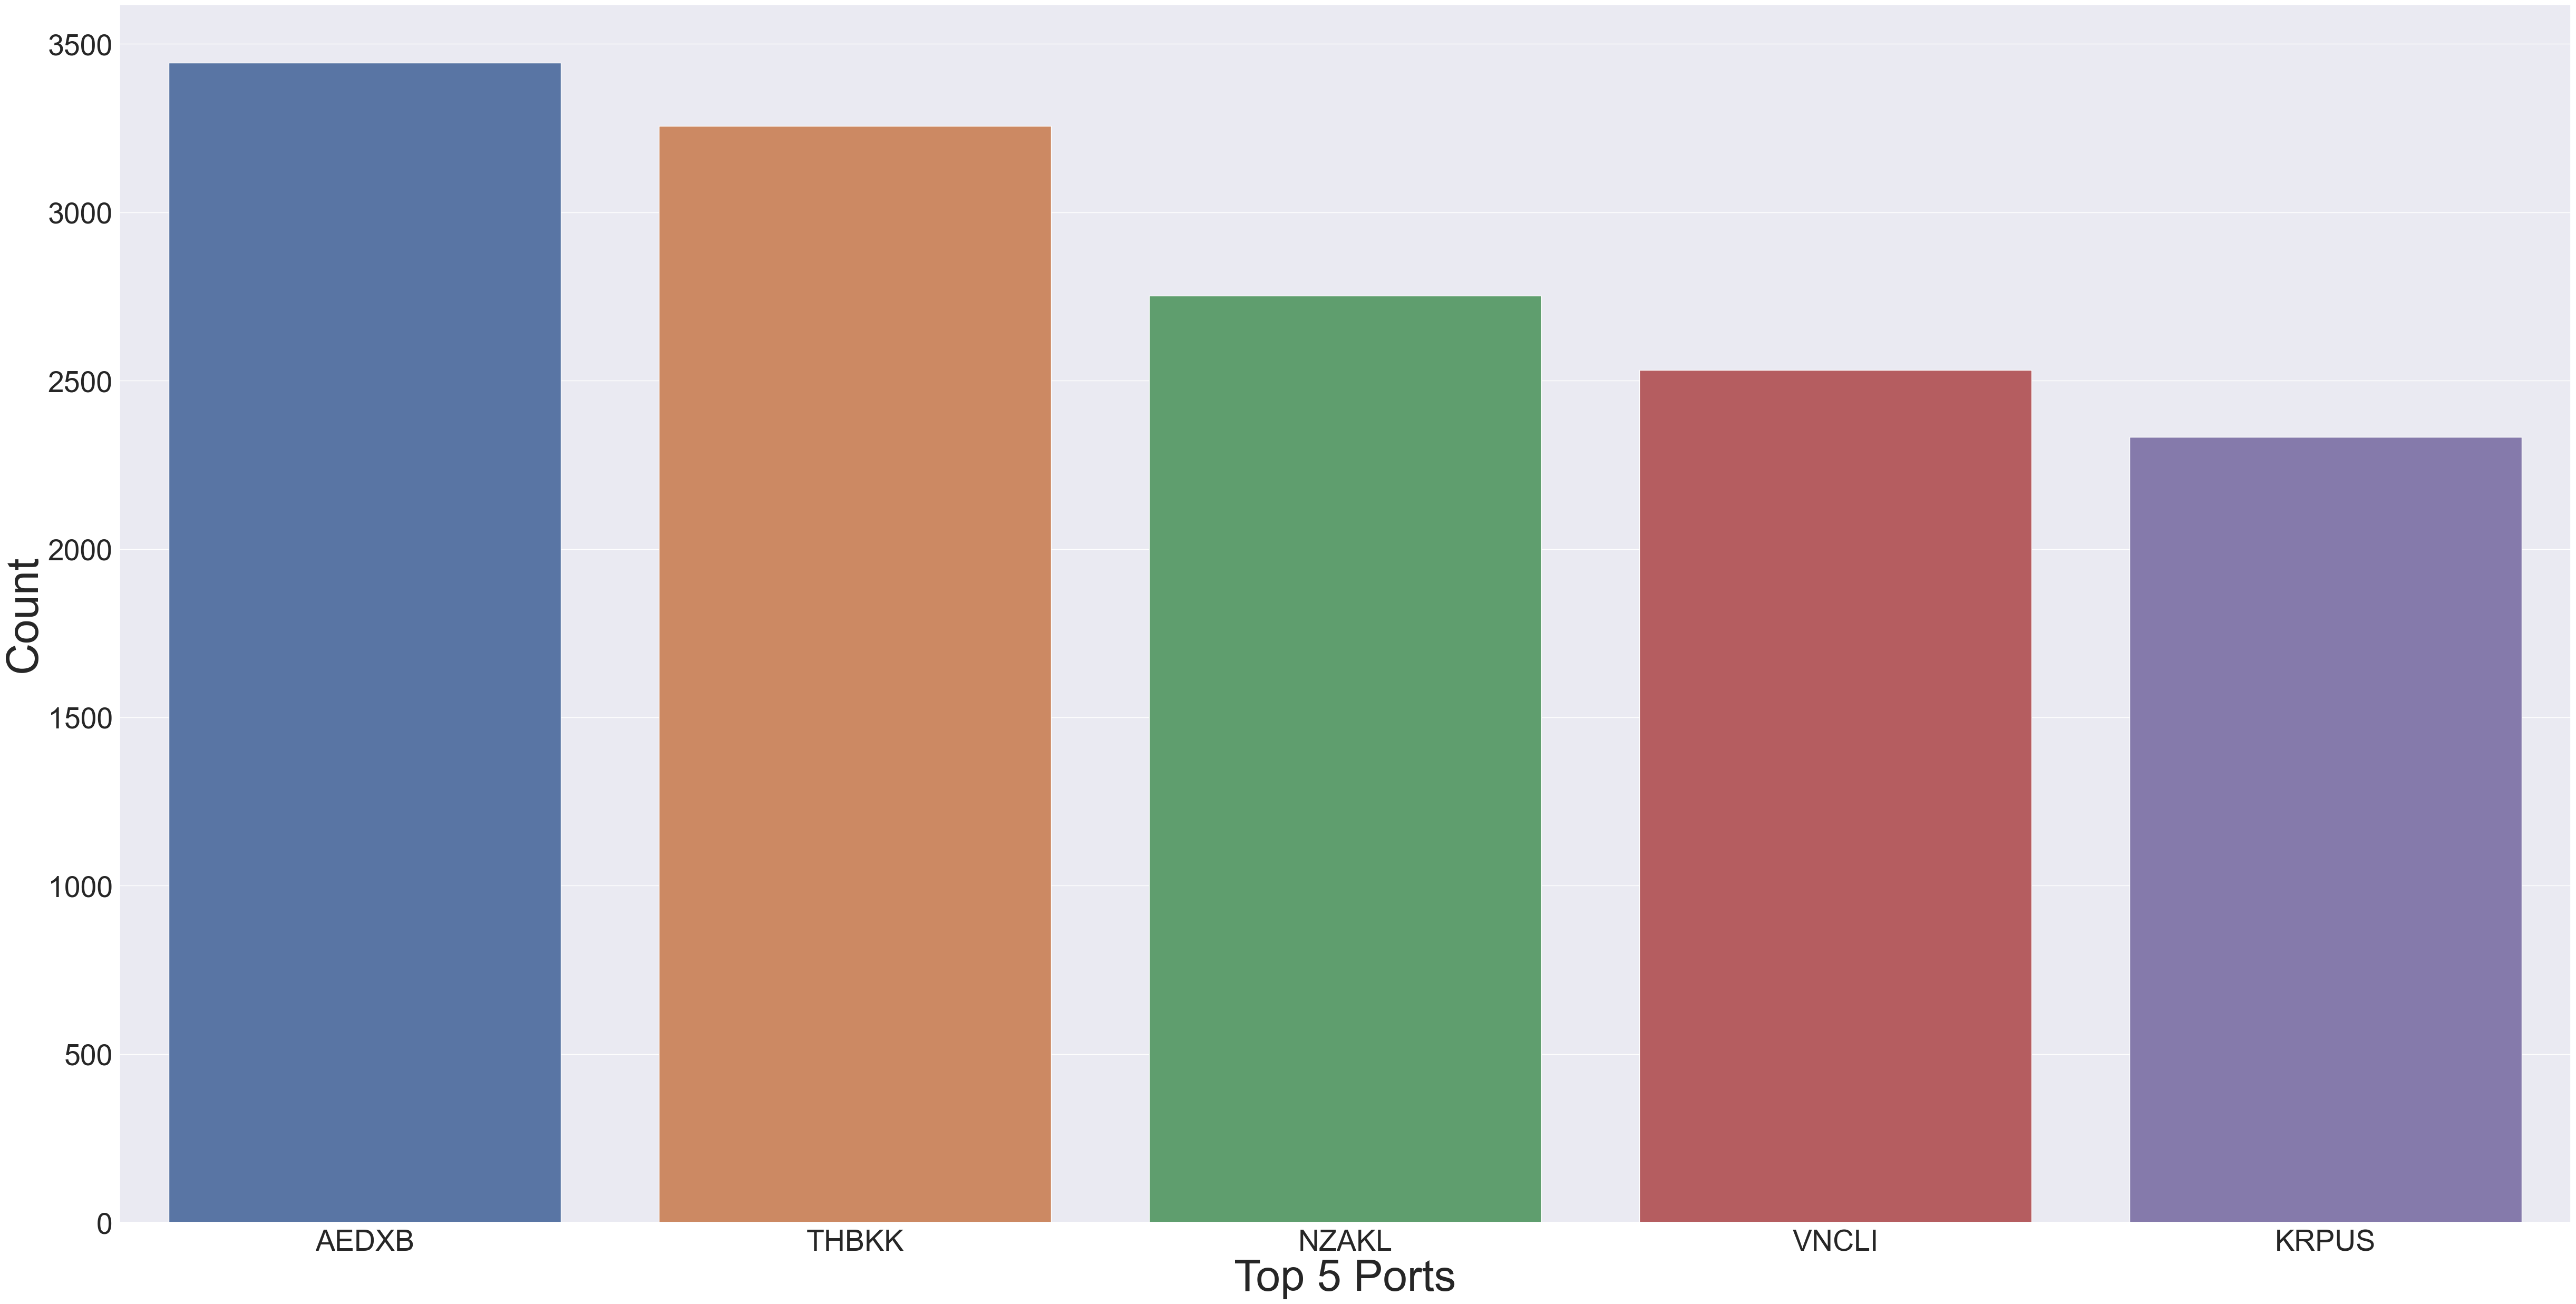

In [50]:
fig = plt.figure(figsize=(60, 30))

# Get the count of each POD_ID
pod_count = df['POD_ID'].value_counts()

# Get the top 5 values
top_5 = pod_count.nlargest(5)

sns.countplot(x="POD_ID", data=df, order=top_5.index)

# Set the labels for the x-axis
plt.xlabel("Top 5 Ports", fontsize=60)
plt.xticks(rotation=0, fontsize=40)
plt.ylabel("Count", fontsize=60)
plt.yticks(rotation=0, fontsize=40)
plt.show();


<h4>Using port AEDXB is one of the ports that is with the most exports.</h4>
<p>Must perform EDA based on ports because different ports have different cost price due to the distance from singapore the that country.</p>

<p>Change the global var here:</p>

In [51]:
sel_port = "AEDXB"
sel_cntr_type = "HC"
sel_cntr_size = 40
sel_party = "01002788"

In [52]:
sel_port_df = df[df["POD_ID"] == sel_port]
sel_port_df.head()
print("Port " + sel_port + " " + f'dataset size: {sel_port_df.shape}')

COST_RATE   PARTY_ID POD_ID  ETD_POL_D  CNTR_SIZE CNTR_TYPE
150      700.0   01002788  AEDXB 2020-08-31         40        HC
153      700.0   01002788  AEDXB 2020-08-31         40        HC
257      850.0   01002788  AEDXB 2020-09-14         40        HC
258      850.0   01002788  AEDXB 2020-09-14         40        HC
494      700.0  010021964  AEDXB 2020-09-30         40        HC

Port AEDXB dataset size: (3444, 6)


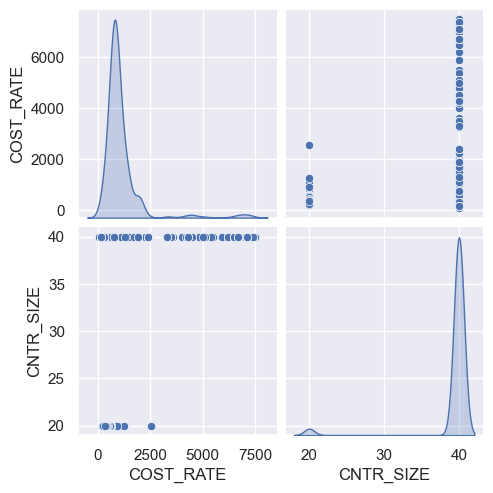

In [53]:
data = sel_port_df.select_dtypes(include=['float64', 'int64', "object"])
sns.pairplot(data=data, diag_kind='kde')


<p>Cost rate is right skewed - Positive skewed</p>
<p>Container size is left skewed - Negative skewed</p>

<h4>Count for container type and size for selected port.</h4>

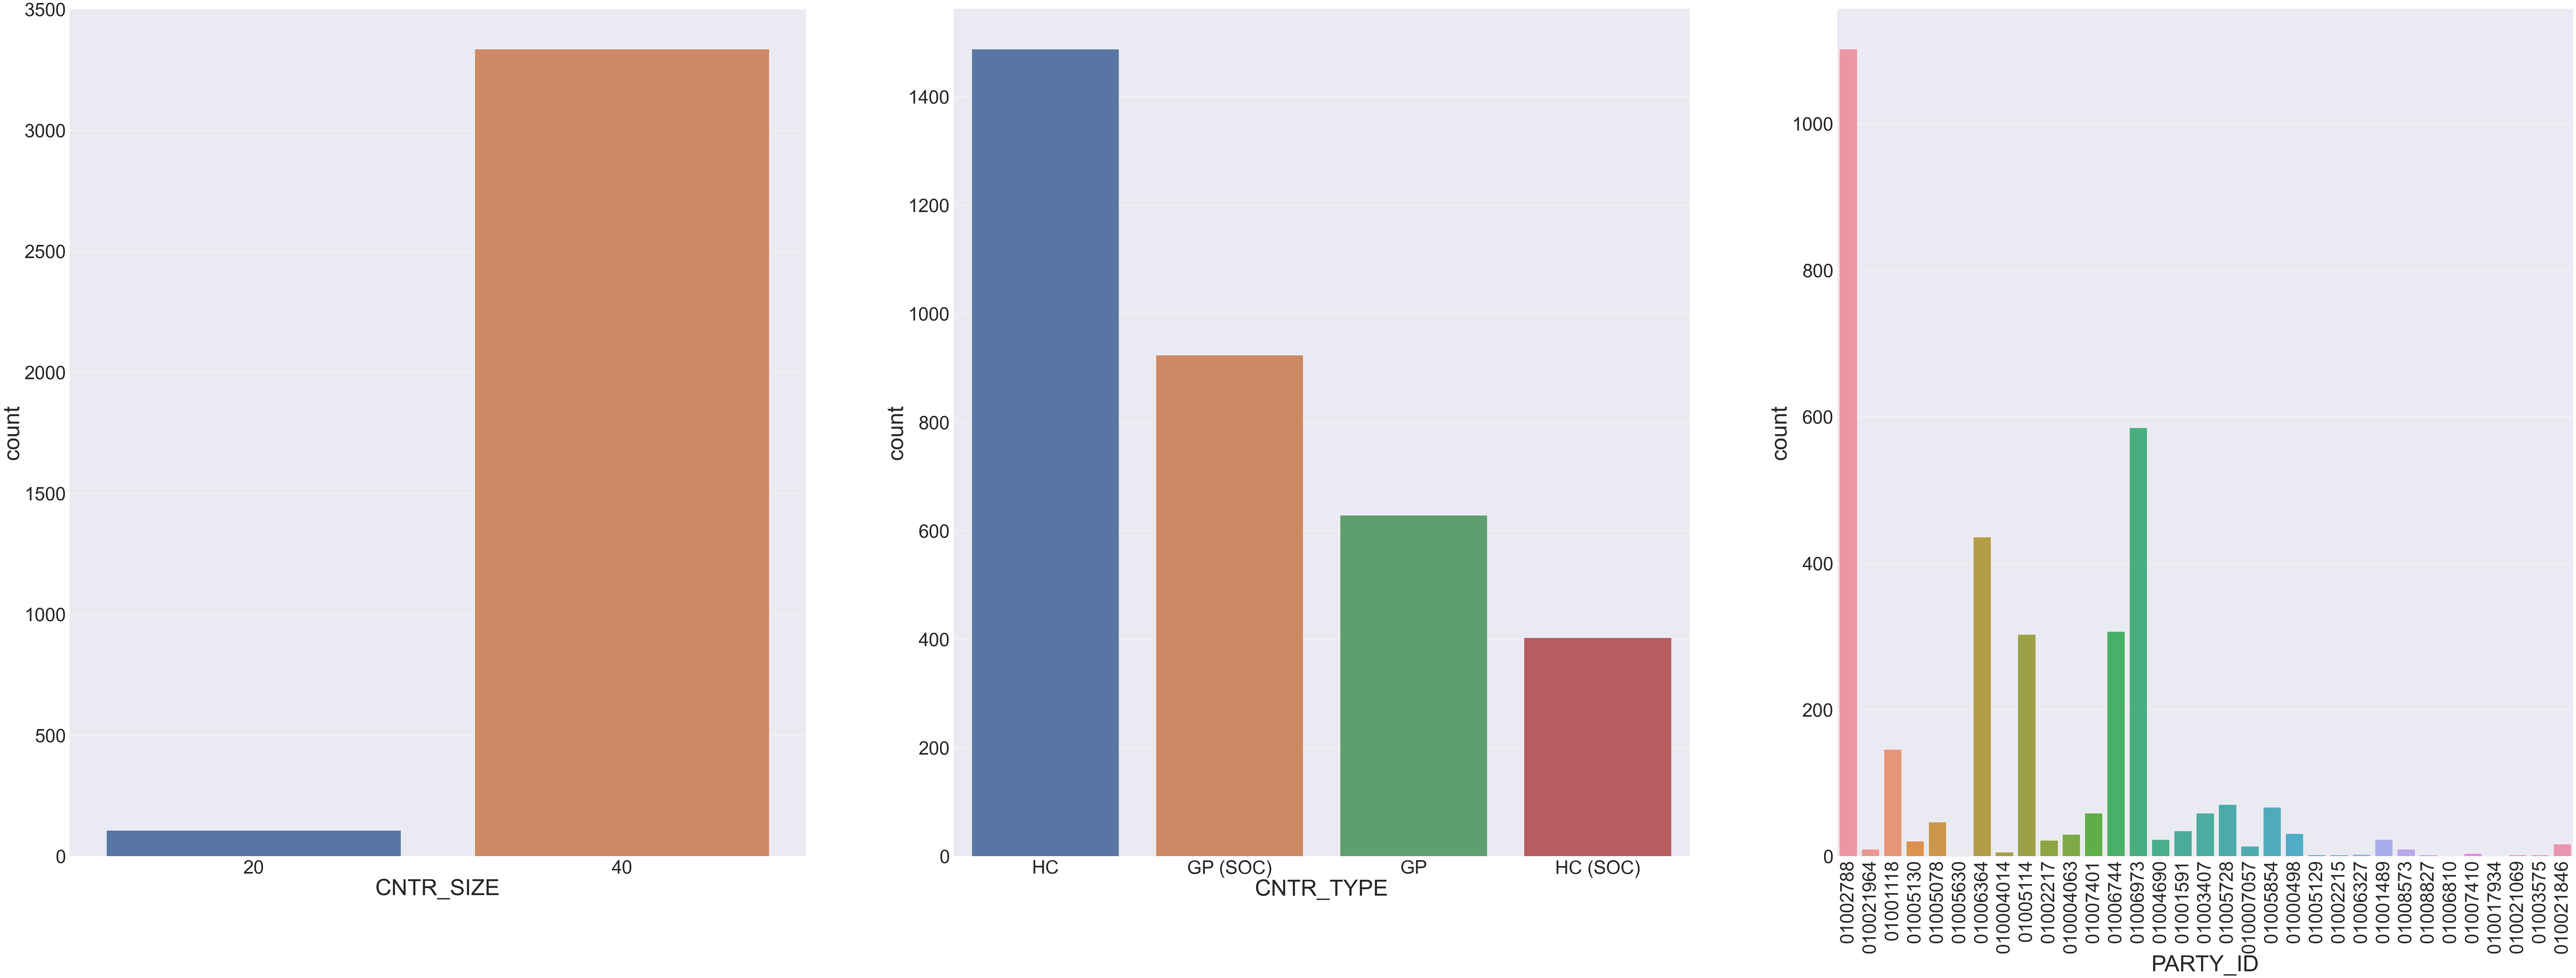

In [54]:
columns = ["PARTY_ID", "POD_ID", "CNTR_SIZE",
           "CNTR_TYPE", "COST_RATE", "ETD_POL_D"]
data = sel_port_df[columns]

fig = plt.figure(figsize=(120, 90))

ax1 = plt.subplot2grid((2, 3), (0, 0))
ax2 = plt.subplot2grid((2, 3), (0, 1))
ax3 = plt.subplot2grid((2, 3), (0, 2))

plt.setp(ax1.get_xticklabels(), fontsize=50)
plt.setp(ax1.get_yticklabels(), fontsize=50)
ax1.set_xlabel("Container Size", fontsize=60)
ax1.set_ylabel("Count", fontsize=60)

plt.setp(ax2.get_xticklabels(), fontsize=50)
plt.setp(ax2.get_yticklabels(), fontsize=50)
ax2.set_xlabel("Container Type", fontsize=60)
ax2.set_ylabel("Count", fontsize=60)

plt.setp(ax3.get_xticklabels(), fontsize=50, rotation=90)
plt.setp(ax3.get_yticklabels(), fontsize=50)
ax3.set_xlabel("Party ID", fontsize=60)
ax3.set_ylabel("Count", fontsize=60)

# Get the values of the x-axis and their counts
counts_type = data["CNTR_TYPE"].value_counts().sort_values(ascending=False)

# Sort the values of the x-axis by their counts in descending order
sns.countplot(x="CNTR_SIZE", data=data, ax=ax1);
sns.countplot(x="CNTR_TYPE", data=data, order=counts_type.index, ax=ax2);
sns.countplot(x="PARTY_ID", data=data, ax=ax3);

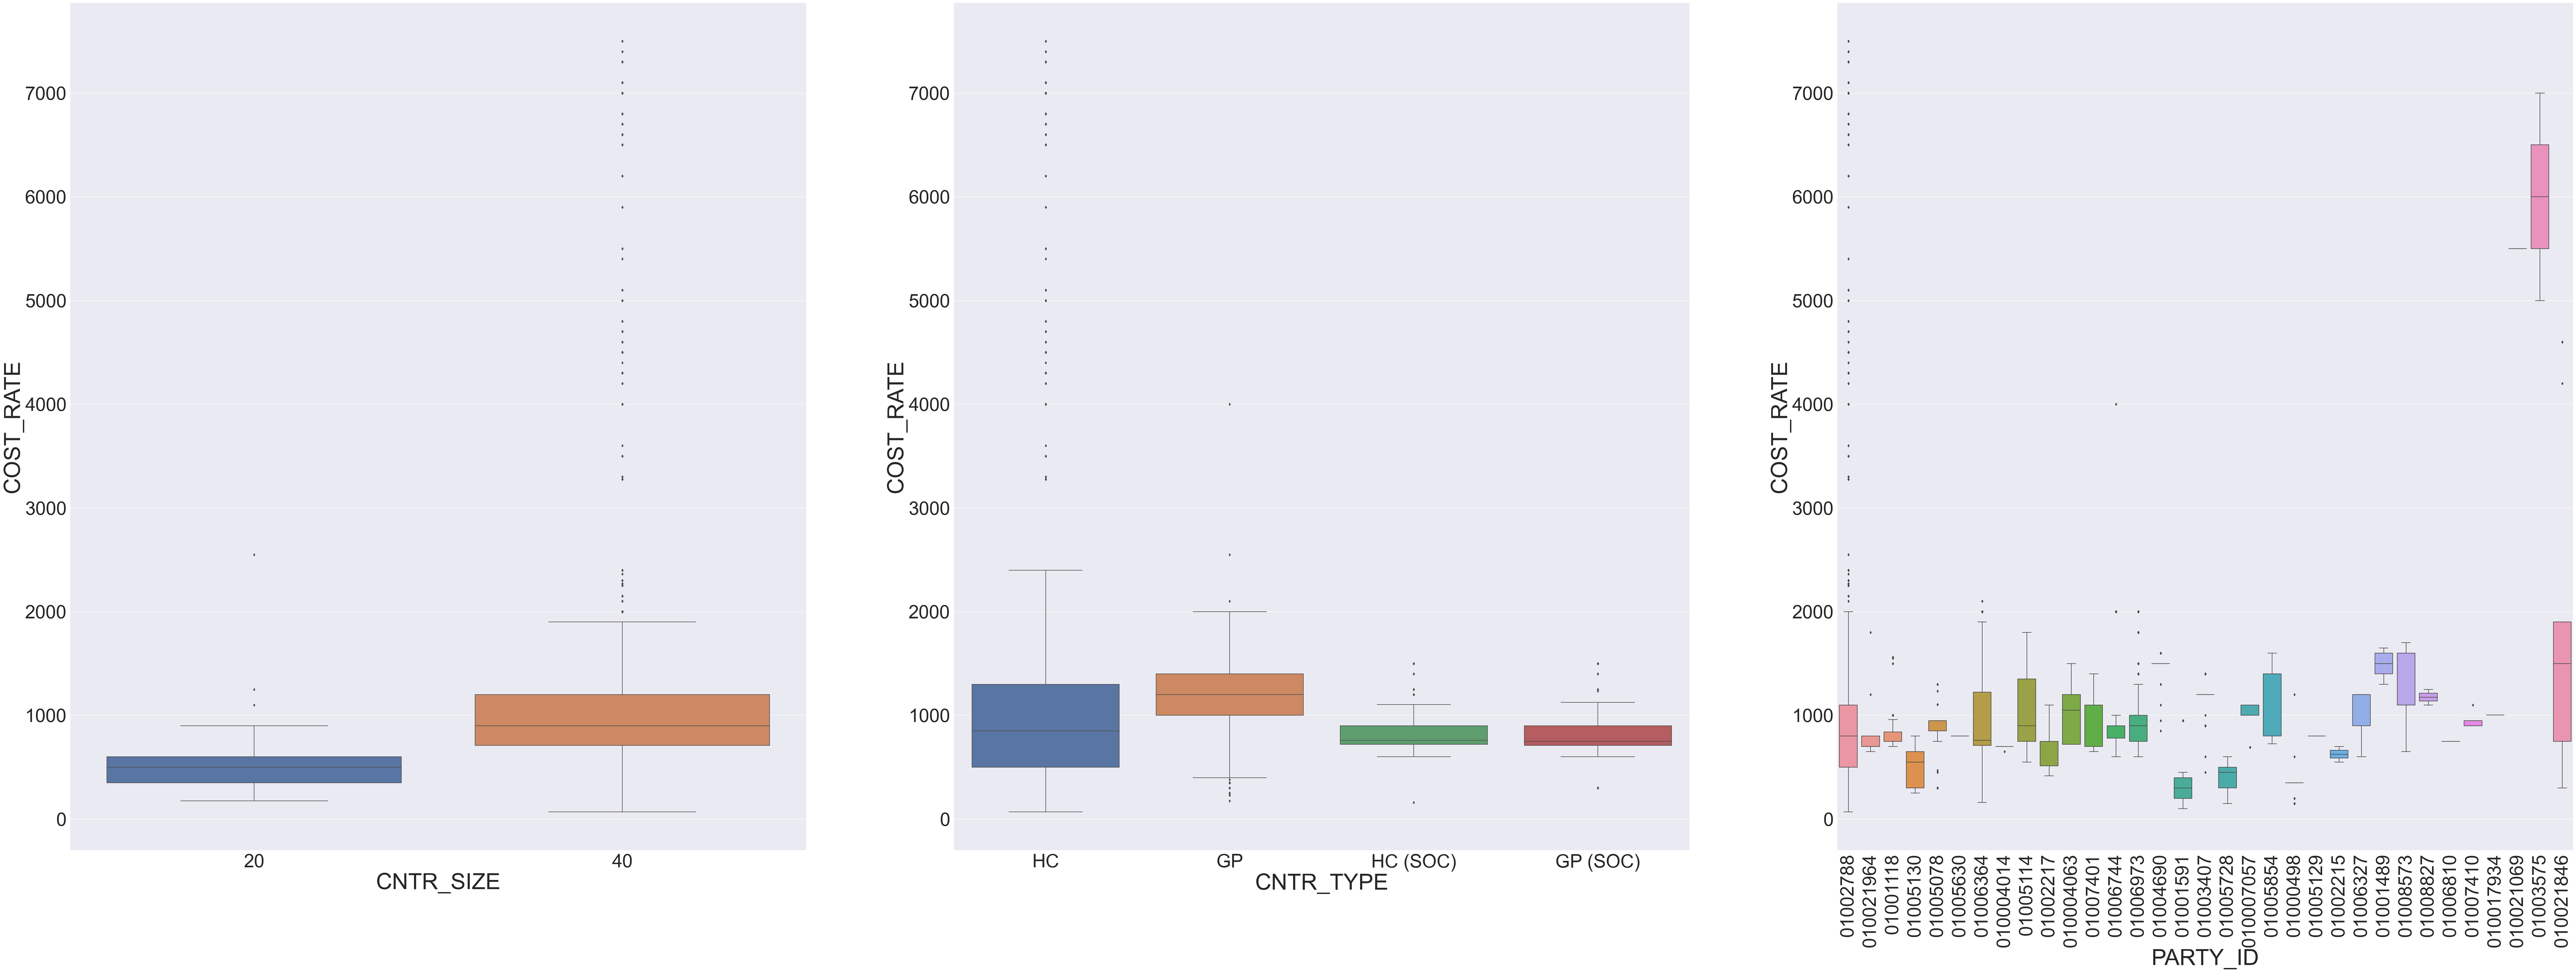

In [55]:
fig = plt.figure(figsize=(120, 90))

ax1_1 = plt.subplot2grid((2, 3), (0, 0))
ax2_1 = plt.subplot2grid((2, 3), (0, 1))
ax3_1 = plt.subplot2grid((2, 3), (0, 2))

plt.setp(ax1_1.get_xticklabels(), fontsize=50)
plt.setp(ax1_1.get_yticklabels(), fontsize=50)
ax1_1.set_xlabel("Container Size", fontsize=60)
ax1_1.set_ylabel("Cost Rate", fontsize=60)

plt.setp(ax2_1.get_xticklabels(), fontsize=50)
plt.setp(ax2_1.get_yticklabels(), fontsize=50)
ax2_1.set_xlabel("Container Type", fontsize=60)
ax2_1.set_ylabel("Cost Rate", fontsize=60)

plt.setp(ax3_1.get_xticklabels(), fontsize=50, rotation=90)
plt.setp(ax3_1.get_yticklabels(), fontsize=50)
ax3_1.set_xlabel("Party ID", fontsize=60)
ax3_1.set_ylabel("Cost Rate", fontsize=60)

sns.boxplot(x="CNTR_SIZE", y="COST_RATE", data=data, ax=ax1_1);
sns.boxplot(x="CNTR_TYPE", y="COST_RATE", data=data, ax=ax2_1);
sns.boxplot(x="PARTY_ID", y="COST_RATE", data=data, ax=ax3_1);

<h4>Above Observations: </h4>
<p>Using countplot and boxplot to see how it brings out the impact on cost rate for port AEDXB.<p>
<p>
    <ol>
        <li>The company rents more 40 sqr feet containters</li>
        <li>HC container type and uses around 30% more compared to other container type.</li>
        <li>Exports to AEDXB most used HC, GP(SOC), GP and HC(SOC) container types. </li>
        <li>Container type GP cost higher compared to the other container types.</li>
        <li>Container types HC and GP cost more then container types that is Shipper owned container.</li>
        <li>There are alot of outliers for container HC and GP. This might shows that are a few cost rate that might be overcharged.</li>
    </ol>
</p>

C:\Users\it1\AppData\Local\Temp\ipykernel_45268\3522254188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_month'] = pd.to_datetime(data['ETD_POL_D'])


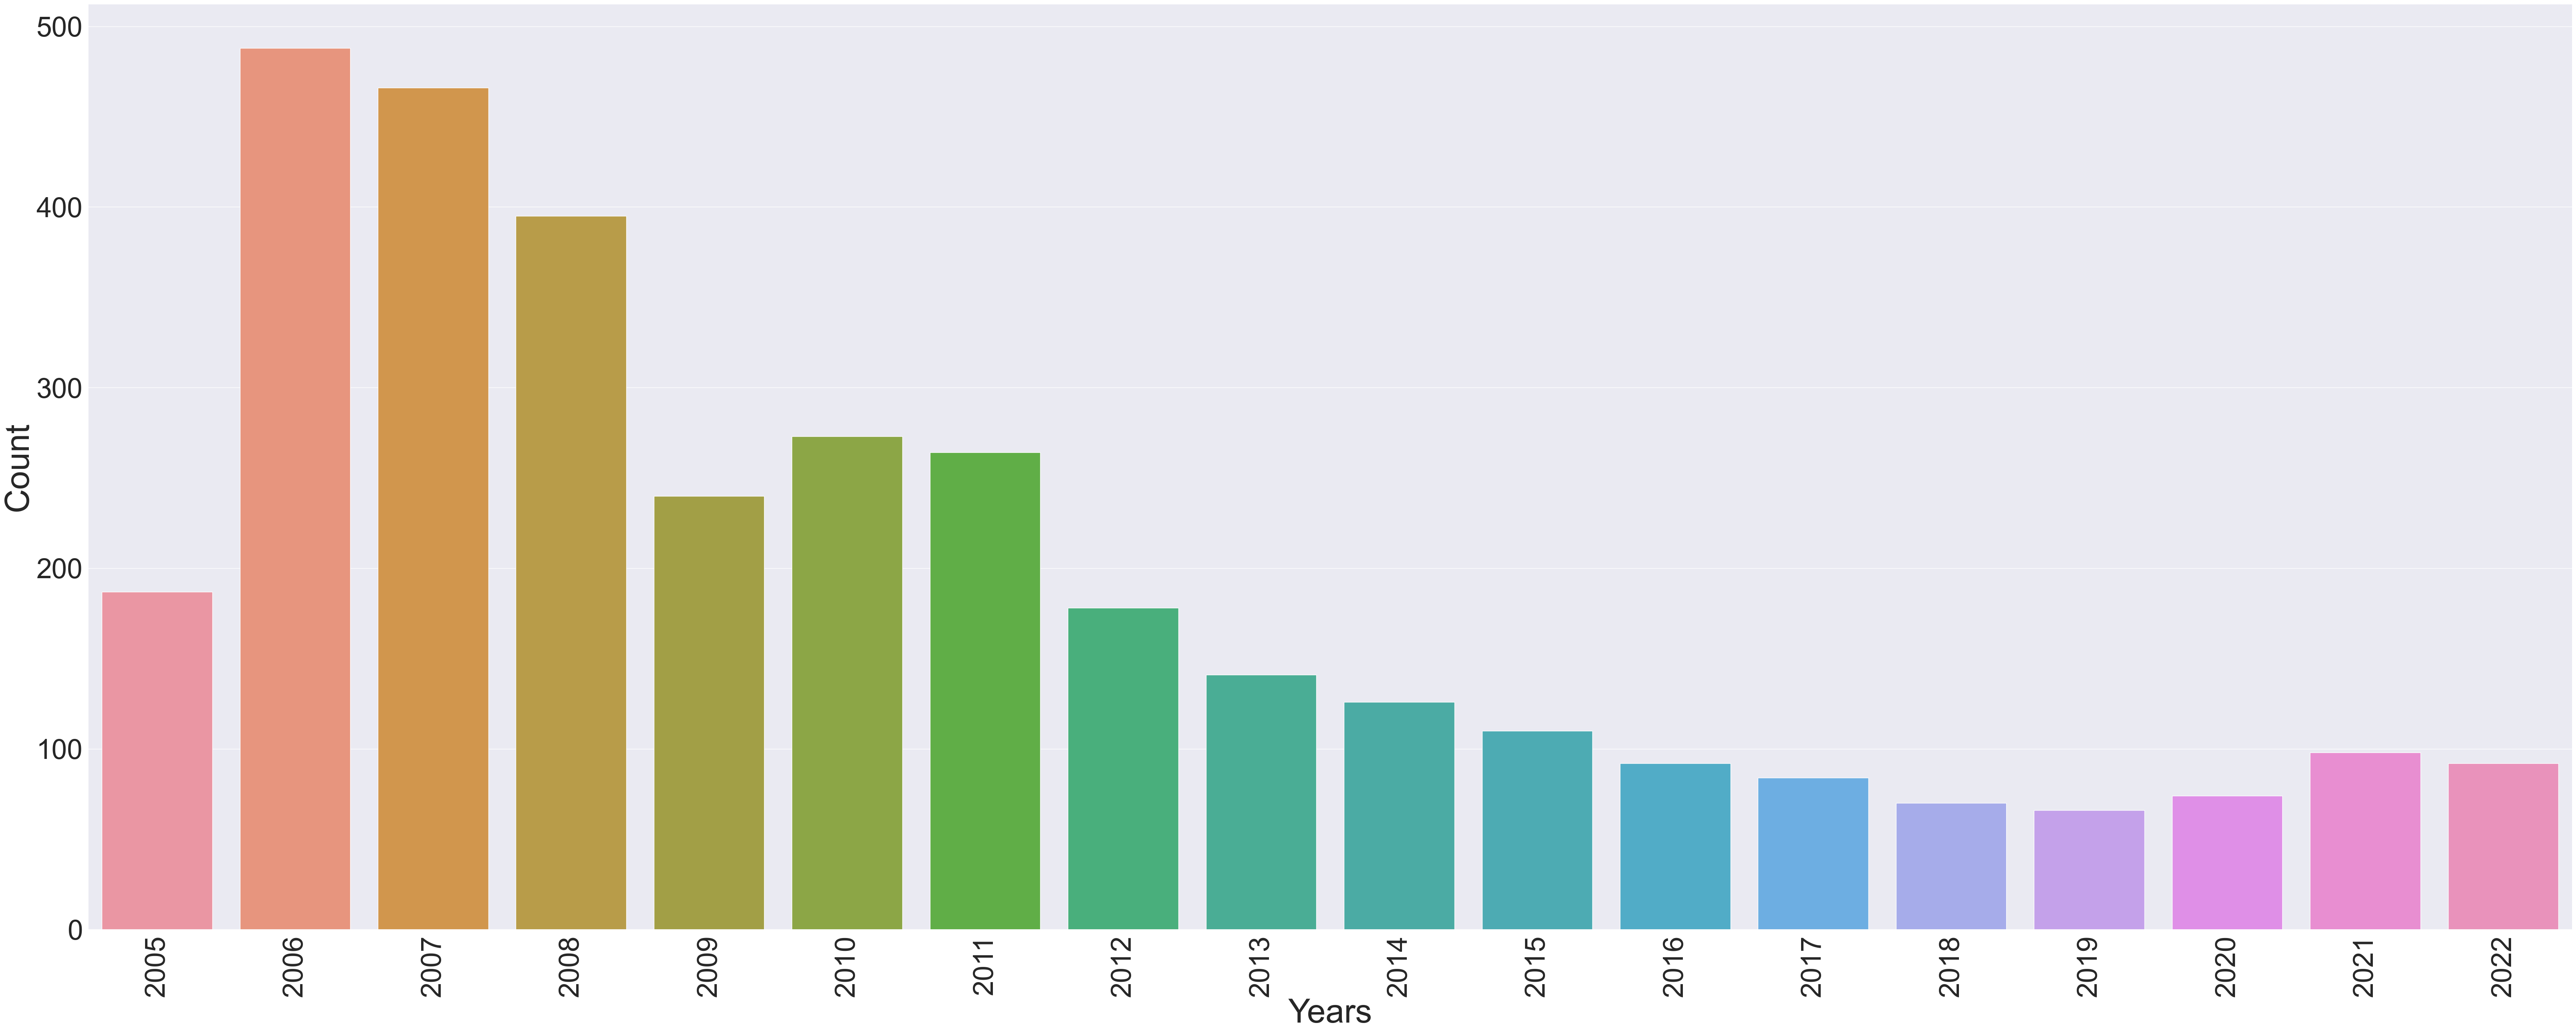

In [56]:
fig = plt.figure(figsize=(80, 30))
data['year_month'] = pd.to_datetime(data['ETD_POL_D'])
data = data.sort_values(by='year_month')
data['year'] = data['year_month'].dt.year
sns.countplot(data=data, x='year');

plt.xticks(rotation=90, fontsize=50);
plt.yticks(rotation=0, fontsize=50);
plt.xlabel("Years", fontsize=60);
plt.ylabel("Count", fontsize=60);


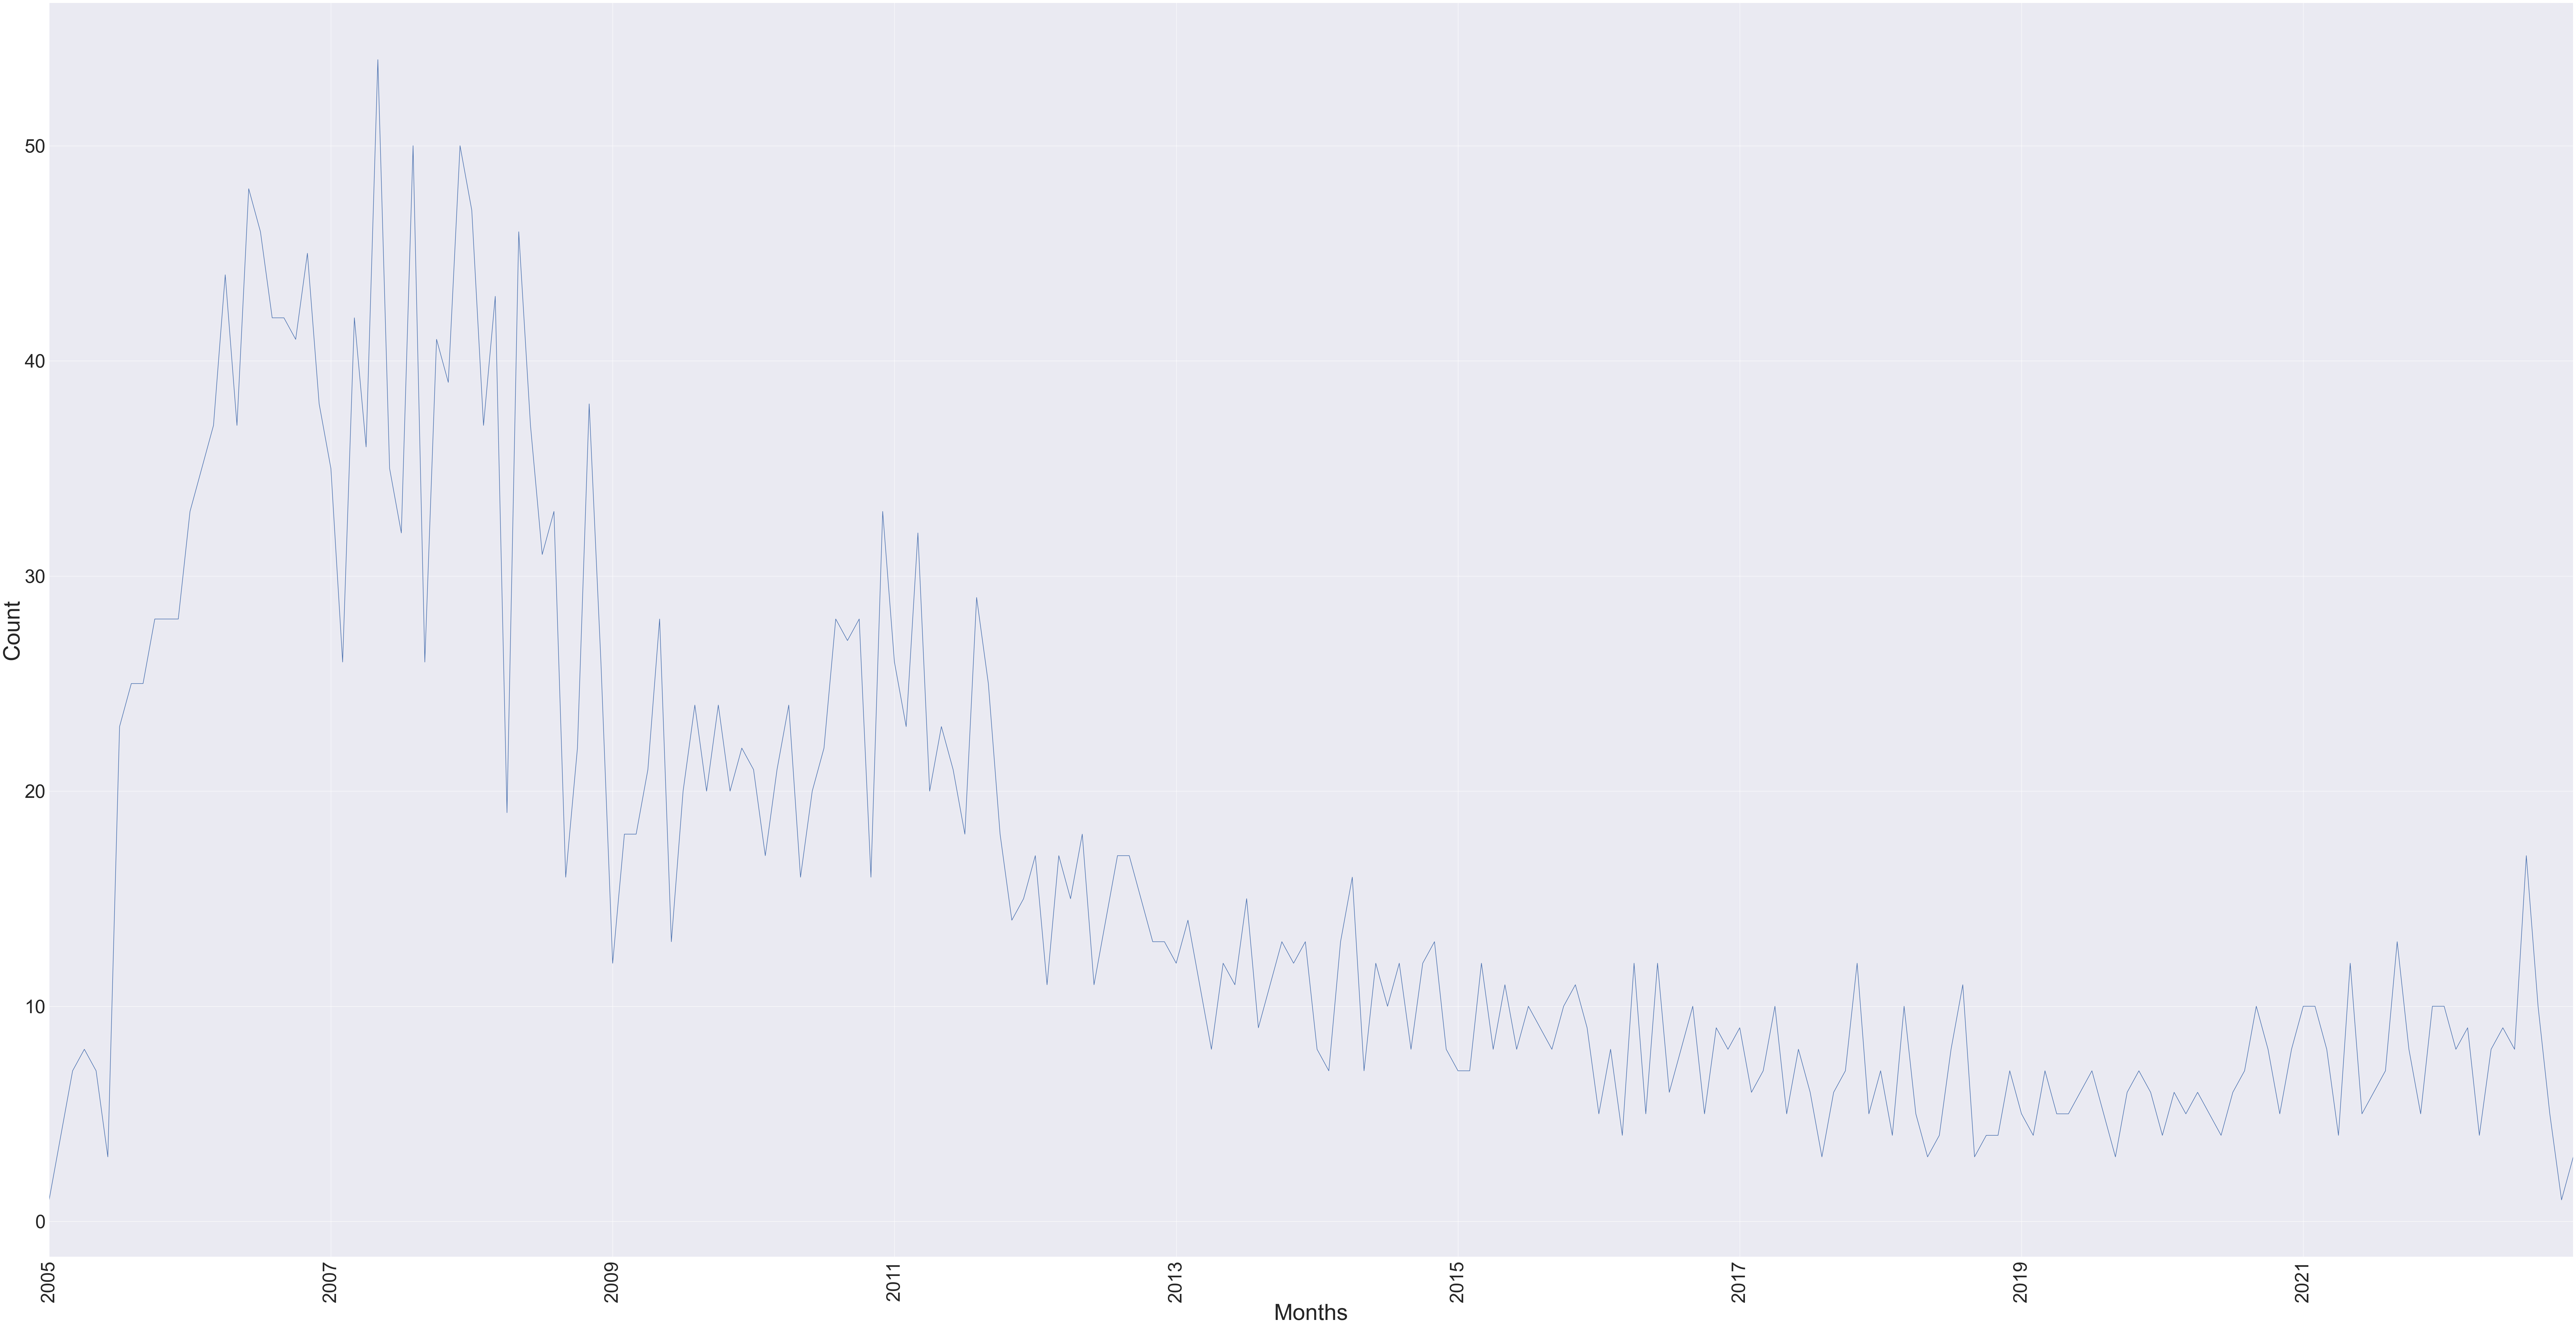

In [57]:
data['year_month'] = pd.to_datetime(data['year_month'])
data.set_index('year_month', inplace=True)
year_month_count = data.groupby(pd.Grouper(freq='M')).size()
fig, ax = plt.subplots(figsize=(120, 60))
year_month_count.plot(kind='line')
ax.set_xlabel("Months", fontsize=60);
ax.set_ylabel("Count", fontsize=60);
plt.xticks(rotation=90, fontsize=50);
plt.yticks(rotation=0, fontsize=50);

In [58]:
fig, ax = plt.subplots(figsize=(180, 60))
year_month_count.plot(kind='bar',width=0.9)
ax.set_xlabel("Months", fontsize=60);
ax.set_ylabel("Count", fontsize=60);
plt.xticks(rotation=90, fontsize=50);
plt.yticks(rotation=0, fontsize=50);

<h4>Viewing by period:</h4>
<p>"2Y" means 2 years period. Can change to something else to see more.</p>

In [59]:
fig, ax = plt.subplots(figsize=(120, 60))
year_month_count_3y = year_month_count.resample('2Y').sum()
year_month_count_3y.plot(kind='bar')
ax.set_xlabel("Months", fontsize=60);
ax.set_ylabel("Count", fontsize=60);
plt.xticks(rotation=90, fontsize=50);
plt.yticks(rotation=0, fontsize=50);

In [60]:
# years = data['year'].unique()
# num_subplots = int(np.ceil(len(years)/4))
# fig, axs = plt.subplots(num_subplots, figsize=(120, 100))
# fig.subplots_adjust(hspace=0.5)

# # Graph Settings
# ax.set_xlabel("Months", fontsize=60);
# ax.set_ylabel("Count", fontsize=60);
# plt.xticks(rotation=90, fontsize=50);
# plt.yticks(rotation=0, fontsize=50);


# for i in range(num_subplots):
#     years_data = years[i*4:(i+1)*4]
#     ax.set_title("Years {}-{}".format(years_data[0], years_data[-1]), fontsize=60);
#     data_subset = data[data['year'].isin(years_data)]
#     ax = axs[i] if num_subplots > 1 else axs
#     year_month_count = data_subset.groupby(pd.Grouper(freq='M')).size()
#     year_month_count.plot(kind='bar', ax=ax)


C:\Users\it1\AppData\Local\Temp\ipykernel_45268\895101484.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_year_data['month'] = selected_year_data['year_month_1'].dt.month
C:\Users\it1\AppData\Local\Temp\ipykernel_45268\895101484.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_year_data['month_name'] = selected_year_data['month'].apply(


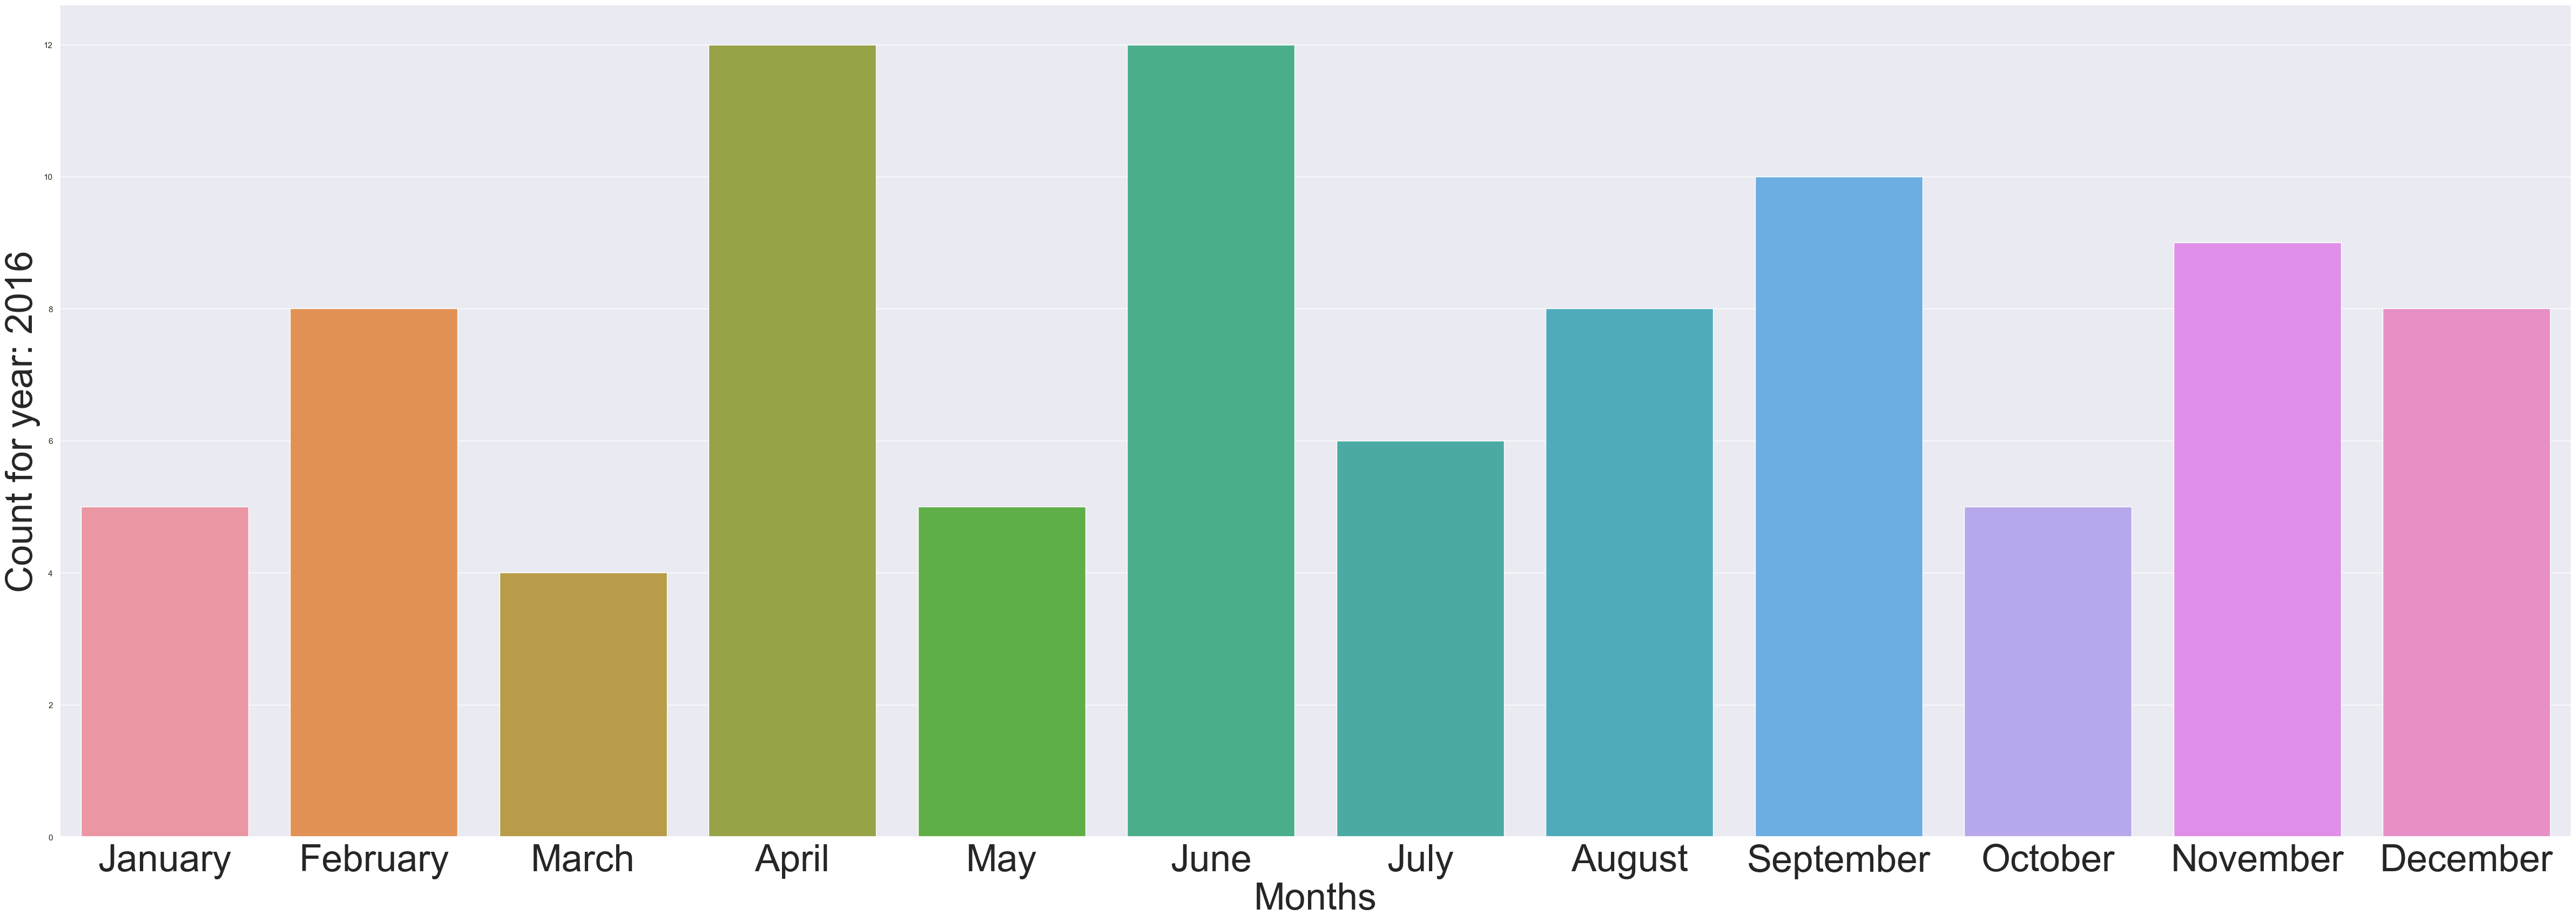

In [61]:
import calendar
selected_year = 2016  # Change year to see the year's performance by months
font_size = 50

fig = plt.figure(figsize=(60, 20))
data['year_month_1'] = pd.to_datetime(data['ETD_POL_D'])
data = data.sort_values(by='year_month_1')
data['year'] = data['year_month_1'].dt.year

# Select year and extract by year
selected_year_data = data[data['year'] == selected_year]
# Select year and extract by month
selected_year_data['month'] = selected_year_data['year_month_1'].dt.month

# Matching month based on what month is it numerically.
selected_year_data['month_name'] = selected_year_data['month'].apply(
    lambda x: calendar.month_name[x])

# Plot graph
sns.countplot(x='month_name', data=selected_year_data);
plt.xlabel("Months", fontsize=font_size);
plt.ylabel(f"Count for year: {selected_year}", fontsize=font_size);
plt.xticks(fontsize=font_size);


<h4>Focused Dataframe</h4>
<ol>
    <li>Selected Port: AEDXB</li>
    <li>Selected Container Size: 40</li>
    <li>Selected Container Type: HC</li>
    <li>Selected Party ID: 01002788</li>
</ol>

<p>As show above, finding out the cost rate distribution for container size 40.</p>
<p>Finding cost rate distribution</p>

In [62]:
# Getting container size 40 data
cntr_size_grp = sel_port_df.groupby(sel_port_df['CNTR_SIZE'])
cntr_size_40 = cntr_size_grp.get_group(sel_cntr_size)
cntr_size_40.head()
print(len(cntr_size_40))

COST_RATE   PARTY_ID POD_ID  ETD_POL_D  CNTR_SIZE CNTR_TYPE
150      700.0   01002788  AEDXB 2020-08-31         40        HC
153      700.0   01002788  AEDXB 2020-08-31         40        HC
257      850.0   01002788  AEDXB 2020-09-14         40        HC
258      850.0   01002788  AEDXB 2020-09-14         40        HC
494      700.0  010021964  AEDXB 2020-09-30         40        HC

3336


In [63]:
# Getting container type HC data
cntr_type_grp = cntr_size_40.groupby(cntr_size_40['CNTR_TYPE'])
cntr_hc = cntr_type_grp.get_group(sel_cntr_type)
cntr_hc.head()
print(len(cntr_hc))

COST_RATE   PARTY_ID POD_ID  ETD_POL_D  CNTR_SIZE CNTR_TYPE
150      700.0   01002788  AEDXB 2020-08-31         40        HC
153      700.0   01002788  AEDXB 2020-08-31         40        HC
257      850.0   01002788  AEDXB 2020-09-14         40        HC
258      850.0   01002788  AEDXB 2020-09-14         40        HC
494      700.0  010021964  AEDXB 2020-09-30         40        HC

1488


In [64]:
# Getting party id: 01002788 data
sel_cntr = cntr_hc.groupby(cntr_size_40['PARTY_ID'])
cntr_df = sel_cntr.get_group(sel_party)
cntr_df.head()
print(len(cntr_df))

COST_RATE  PARTY_ID POD_ID  ETD_POL_D  CNTR_SIZE CNTR_TYPE
150      700.0  01002788  AEDXB 2020-08-31         40        HC
153      700.0  01002788  AEDXB 2020-08-31         40        HC
257      850.0  01002788  AEDXB 2020-09-14         40        HC
258      850.0  01002788  AEDXB 2020-09-14         40        HC
605      850.0  01002788  AEDXB 2020-09-30         40        HC

1032


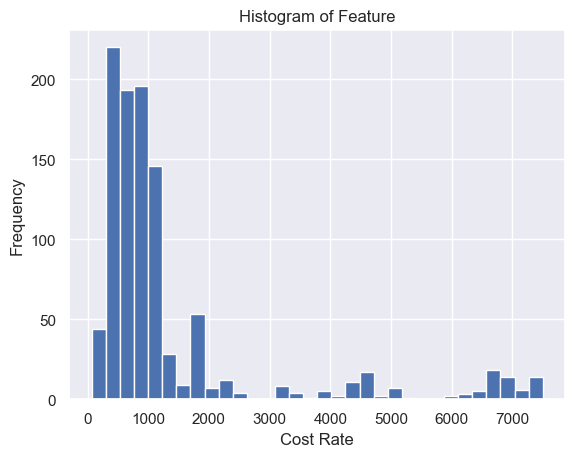

In [65]:
# Create a histogram of the feature using square root to divide data in intervals
plt.hist(cntr_df['COST_RATE'], bins=int(
    np.sqrt(len(cntr_df['COST_RATE']))))

# Add labels and title
plt.xlabel('Cost Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Feature')

# Show the plot
plt.show();


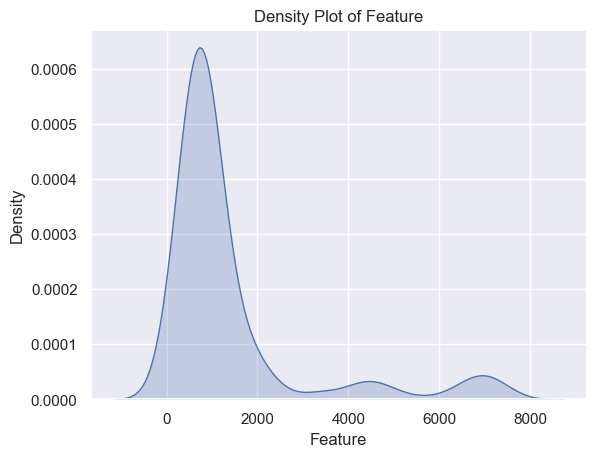

In [66]:
# Create a density plot of the feature
sns.kdeplot(cntr_df['COST_RATE'], fill=True)

# Add labels and title
plt.xlabel('Feature')
plt.ylabel('Density')
plt.title('Density Plot of Feature')

# Show the plot
plt.show();


<p>From above the cost rate quotation for container size 40 is mostly similar except for a few pricier ones.</p>

In [67]:
# Getting HC
cntr_type_grp = cntr_size_40.groupby(cntr_size_40["CNTR_TYPE"])
cntr_type = cntr_type_grp.get_group("HC")
cntr_type.head(10)
print(len(cntr_type))


COST_RATE   PARTY_ID POD_ID  ETD_POL_D  CNTR_SIZE CNTR_TYPE
150      700.0   01002788  AEDXB 2020-08-31         40        HC
153      700.0   01002788  AEDXB 2020-08-31         40        HC
257      850.0   01002788  AEDXB 2020-09-14         40        HC
258      850.0   01002788  AEDXB 2020-09-14         40        HC
494      700.0  010021964  AEDXB 2020-09-30         40        HC
605      850.0   01002788  AEDXB 2020-09-30         40        HC
606      850.0   01002788  AEDXB 2020-09-30         40        HC
664      400.0   01002788  AEDXB 2019-06-14         40        HC
665      400.0   01002788  AEDXB 2019-06-14         40        HC
726      400.0   01002788  AEDXB 2019-06-21         40        HC

1488


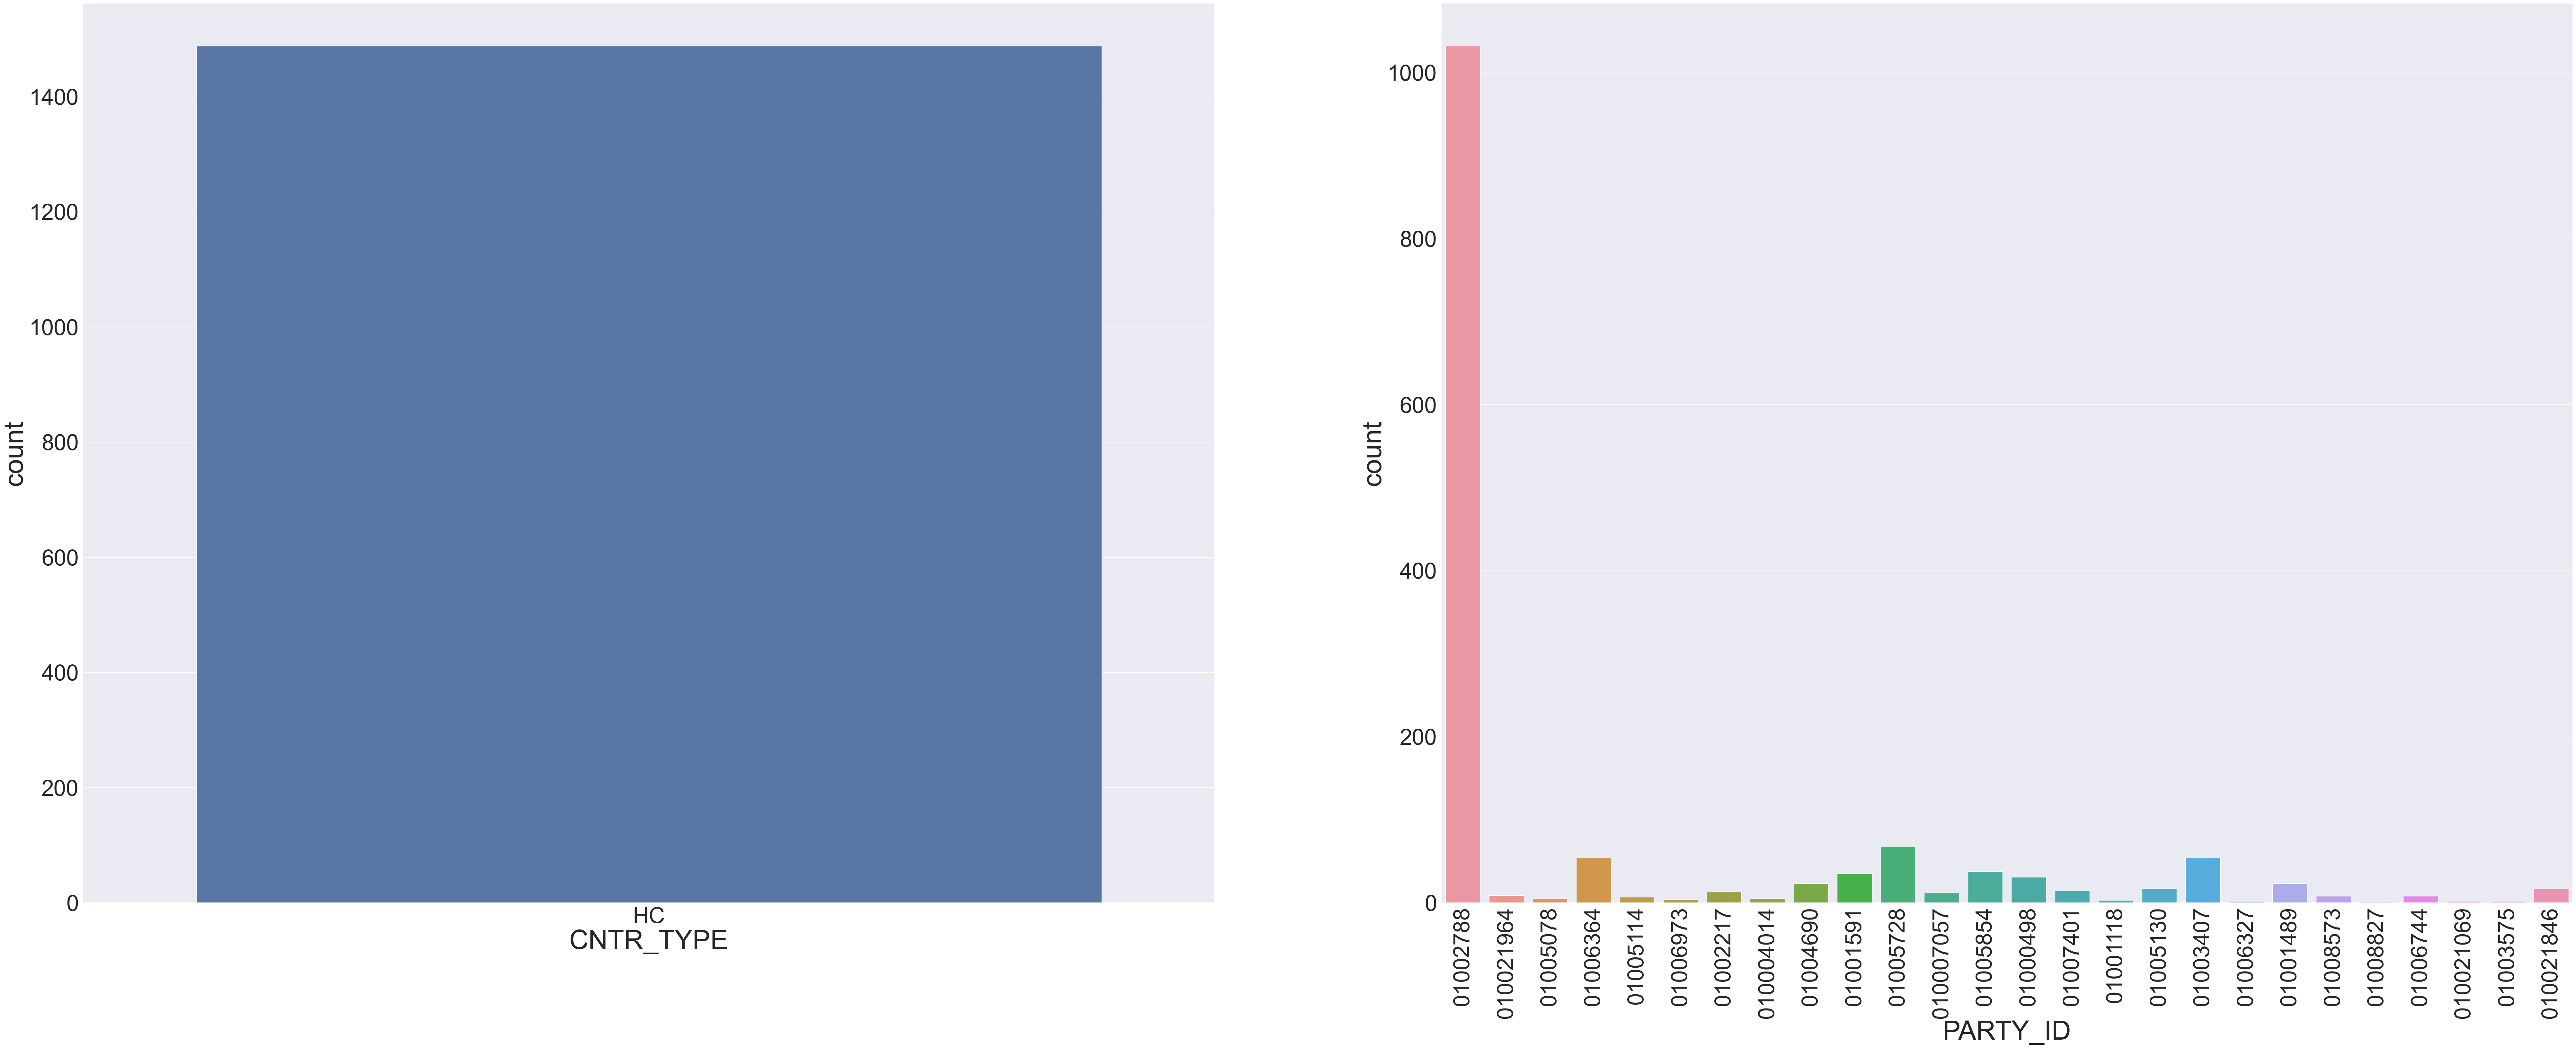

In [68]:
columns = ["PARTY_ID", "POD_ID", "CNTR_SIZE",
           "CNTR_TYPE", "COST_RATE", "ETD_POL_D"]
data = cntr_hc[columns]

fig = plt.figure(figsize=(100, 80))

ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (0, 1))

plt.setp(ax1.get_xticklabels(), fontsize=50)
plt.setp(ax1.get_yticklabels(), fontsize=50)
ax1.set_xlabel("Container Size", fontsize=60)
ax1.set_ylabel("Count", fontsize=60)

plt.setp(ax2.get_xticklabels(), fontsize=50, rotation=90)
plt.setp(ax2.get_yticklabels(), fontsize=50)
ax2.set_xlabel("Container Size", fontsize=60)
ax2.set_ylabel("Count", fontsize=60)

# Get the values of the x-axis and their counts
counts_type = data["CNTR_TYPE"].value_counts().sort_values(ascending=False)

# Sort the values of the x-axis by their counts in descending order
sns.countplot(x="CNTR_TYPE", data=data, order=counts_type.index, ax=ax1);
sns.countplot(x="PARTY_ID", data=data, ax=ax2);


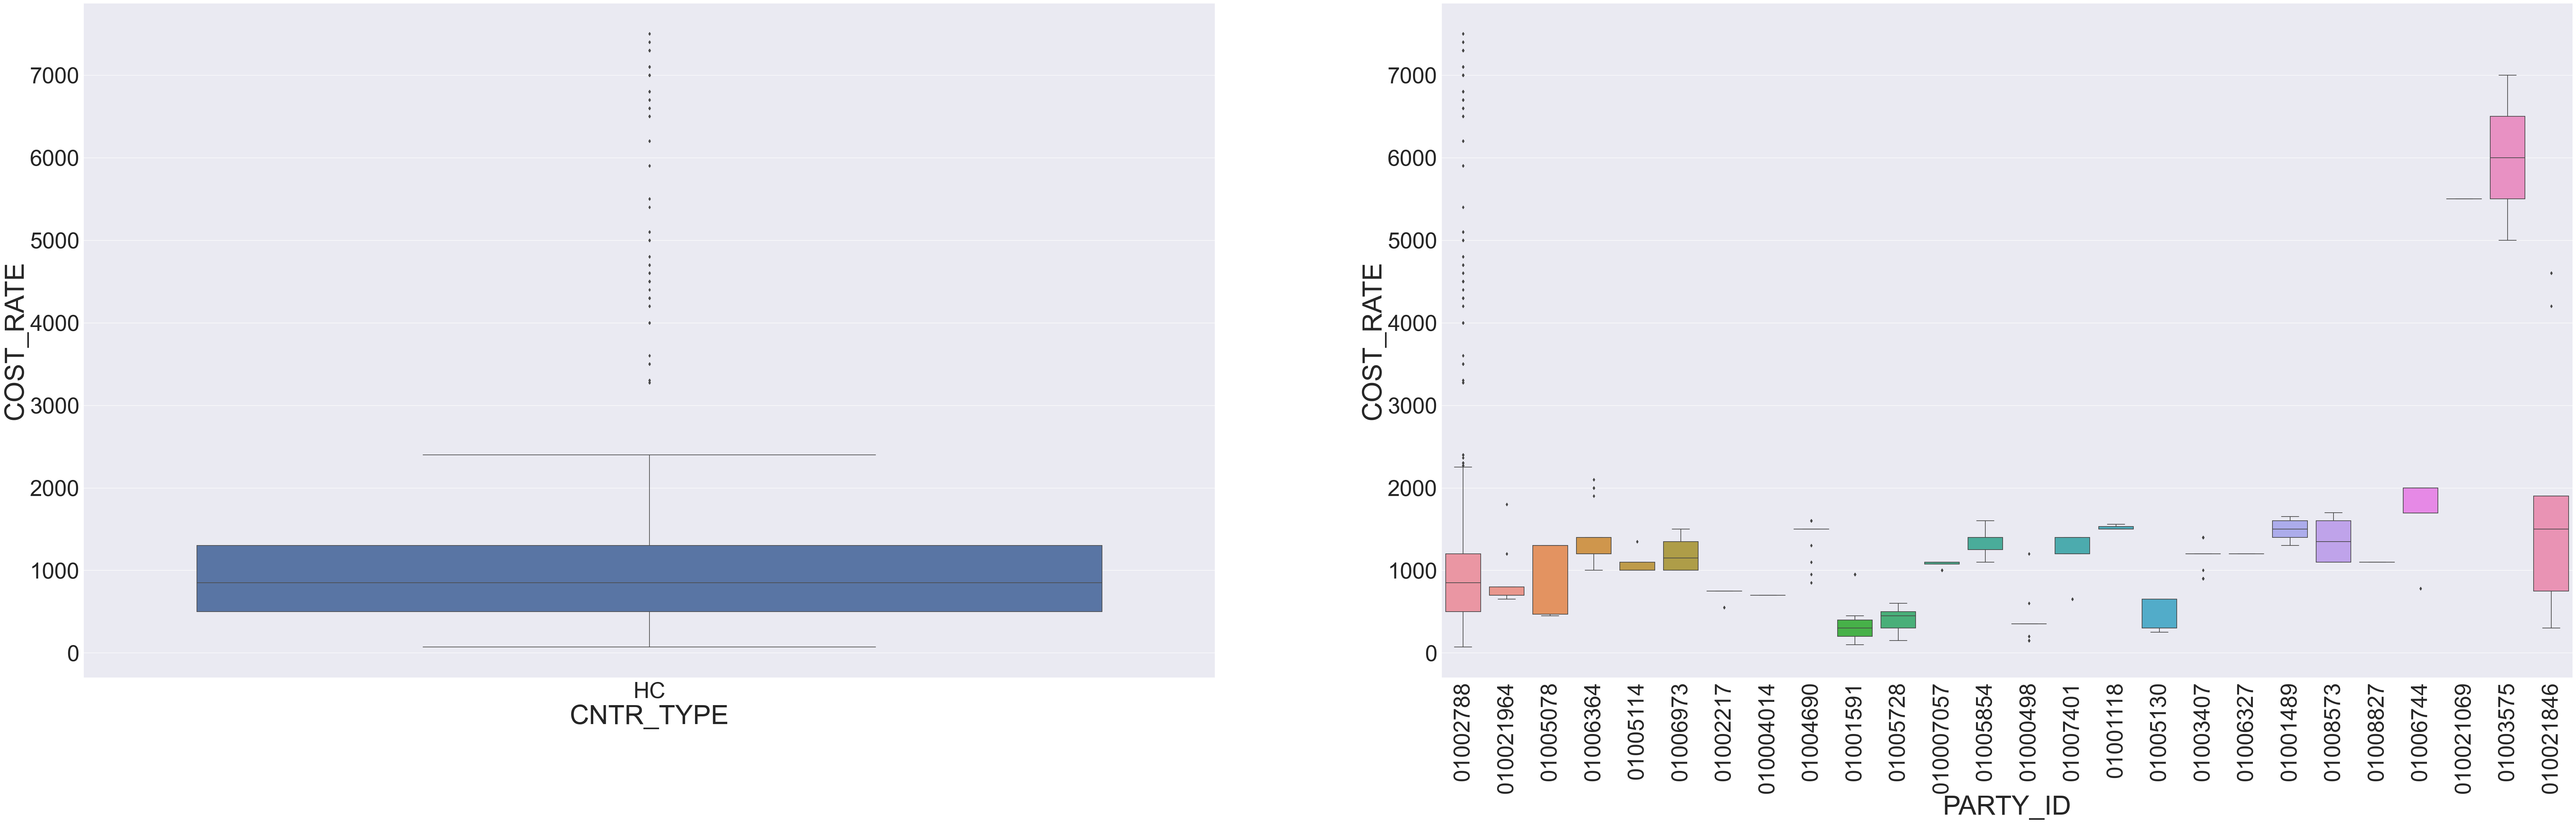

In [69]:
fig = plt.figure(figsize=(100, 60))

ax1_1 = plt.subplot2grid((2, 2), (0, 0))
ax2_1 = plt.subplot2grid((2, 2), (0, 1))

plt.setp(ax1_1.get_xticklabels(), fontsize=50)
plt.setp(ax1_1.get_yticklabels(), fontsize=50)
ax1_1.set_xlabel("CNTR_TYPE", fontsize=60)
ax1_1.set_ylabel("COST_RATE", fontsize=60)

plt.setp(ax2_1.get_xticklabels(), fontsize=50, rotation=90)
plt.setp(ax2_1.get_yticklabels(), fontsize=50)
ax2_1.set_xlabel("PARTY_ID", fontsize=60)
ax2_1.set_ylabel("COST_RATE", fontsize=60)

sns.boxplot(x="CNTR_TYPE", y="COST_RATE", data=data, ax=ax1_1);
sns.boxplot(x="PARTY_ID", y="COST_RATE", data=data, ax=ax2_1);


<p>From above observation, we can tell for container size 40 and container type "HC" The cheapest cost rate quoted is from vendor, "01001591" and the most expensive is from vendor, "01003575".</p>
<ol>
    <li>The cheapest cost rate quoted is from vendor, "01001591"</li>
    <li>The most expensive is from vendor, "01003575"</li>
    <li>Vendor, "01002788" is the most frequent used.</li>
</ol>

<h3>Feature Selection & Normalisation</h3>

In [70]:
# Removing 2005 as it is an outlier
cntr_df = cntr_df[cntr_df['ETD_POL_D'].dt.year != 2005]

In [71]:
print("Before...")
cntr_df.head(10)
print(len(cntr_df))
cntr_df.info()
print("\n")

columns = ['ETD_POL_D','COST_RATE']
sel_cntr_df = pd.DataFrame(cntr_df[columns])

#set date column as index
sel_cntr_df.set_index('ETD_POL_D', inplace=True)
sel_cntr_df= sel_cntr_df.sort_index(ascending=True)

print("After...")
sel_cntr_df.head(10)
sel_cntr_df.info()

Before...


COST_RATE  PARTY_ID POD_ID  ETD_POL_D  CNTR_SIZE CNTR_TYPE
150      700.0  01002788  AEDXB 2020-08-31         40        HC
153      700.0  01002788  AEDXB 2020-08-31         40        HC
257      850.0  01002788  AEDXB 2020-09-14         40        HC
258      850.0  01002788  AEDXB 2020-09-14         40        HC
605      850.0  01002788  AEDXB 2020-09-30         40        HC
606      850.0  01002788  AEDXB 2020-09-30         40        HC
664      400.0  01002788  AEDXB 2019-06-14         40        HC
665      400.0  01002788  AEDXB 2019-06-14         40        HC
726      400.0  01002788  AEDXB 2019-06-21         40        HC
840      400.0  01002788  AEDXB 2019-06-27         40        HC

1031
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 150 to 108441
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   COST_RATE  1031 non-null   float64       
 1   PARTY_ID   1031 non-null   object        
 2   POD_ID     1031 non-null   object        
 3   ETD_POL_D  1031 non-null   datetime64[ns]
 4   CNTR_SIZE  1031 non-null   int64         
 5   CNTR_TYPE  1031 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 56.4+ KB


After...


COST_RATE
ETD_POL_D            
2009-03-07      700.0
2009-03-07      700.0
2009-03-10      850.0
2009-04-09      850.0
2009-04-09      850.0
2009-05-06      650.0
2009-05-12      650.0
2009-05-12      650.0
2009-05-15      700.0
2009-05-15      700.0

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1031 entries, 2009-03-07 to 2022-12-08
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   COST_RATE  1031 non-null   float64
dtypes: float64(1)
memory usage: 16.1 KB


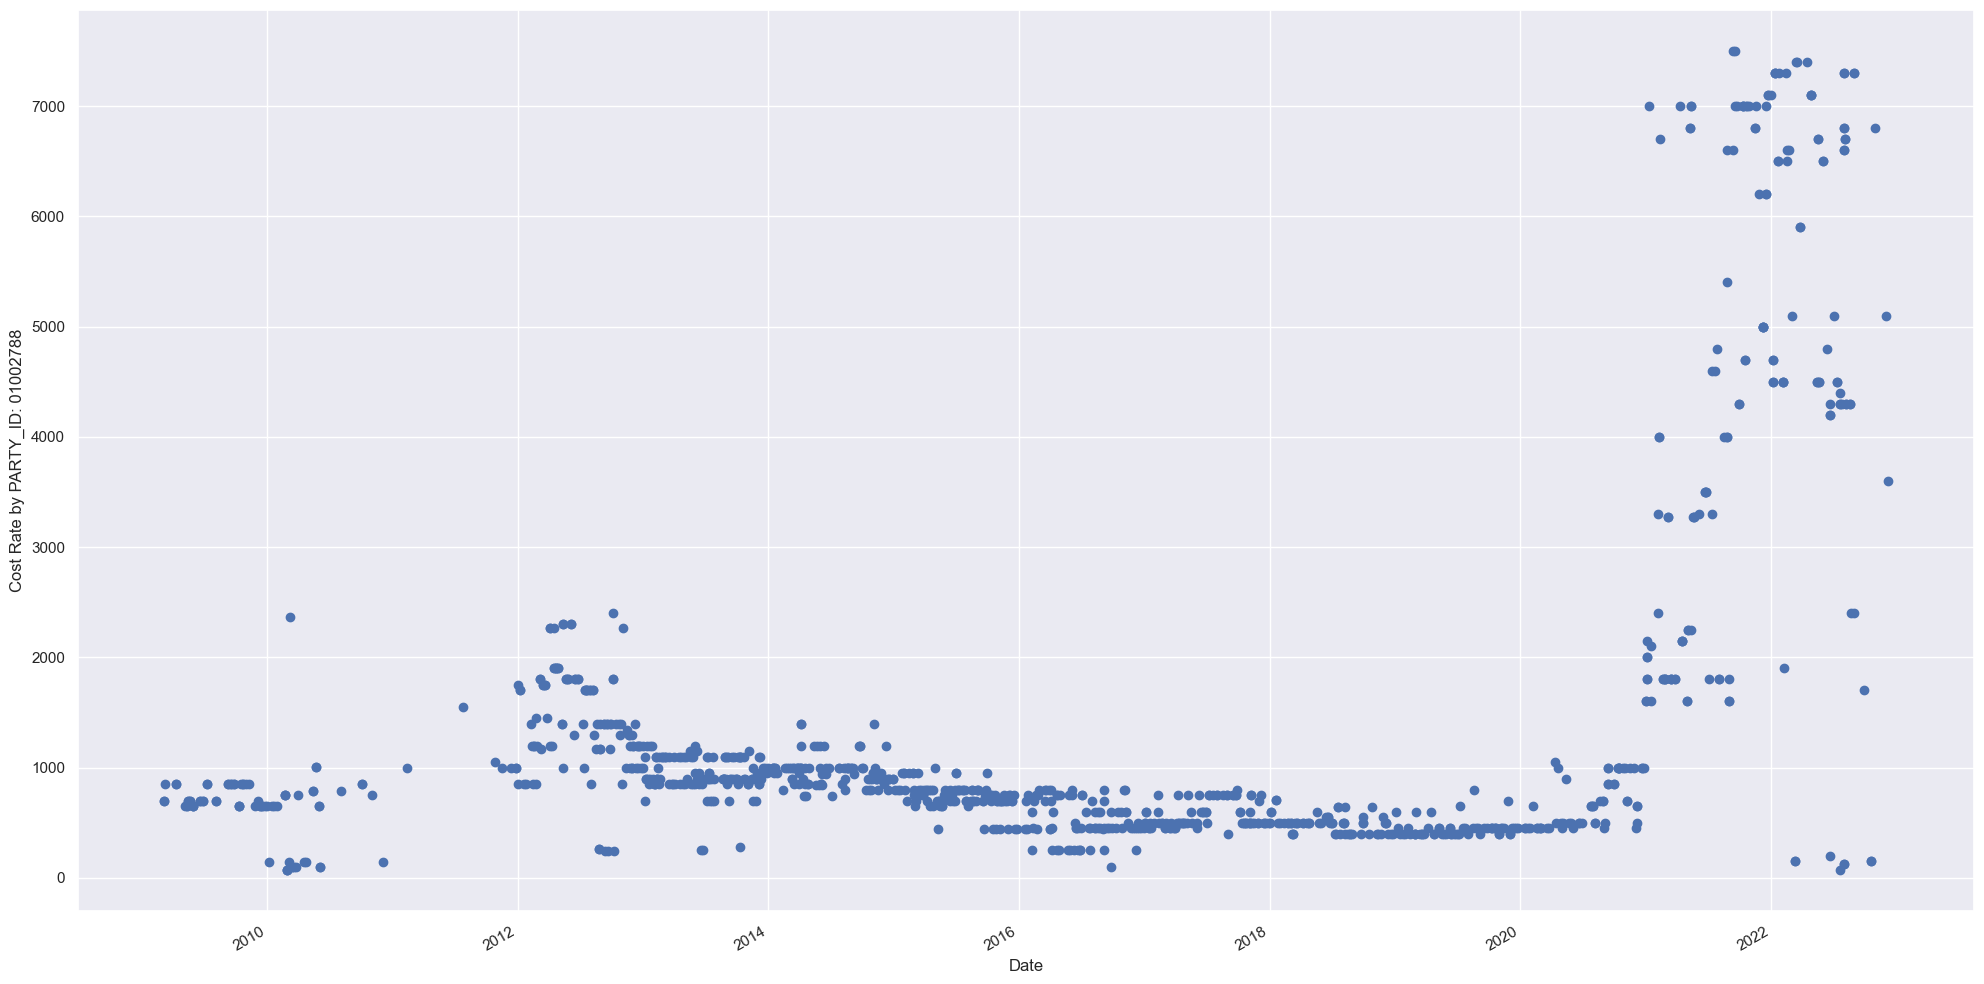

In [72]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.scatter( cntr_df['ETD_POL_D'], cntr_df['COST_RATE']);
ax.set_xlabel('Date')
ax.set_ylabel('Cost Rate by PARTY_ID: ' + sel_party)

fig.autofmt_xdate()
plt.tight_layout();

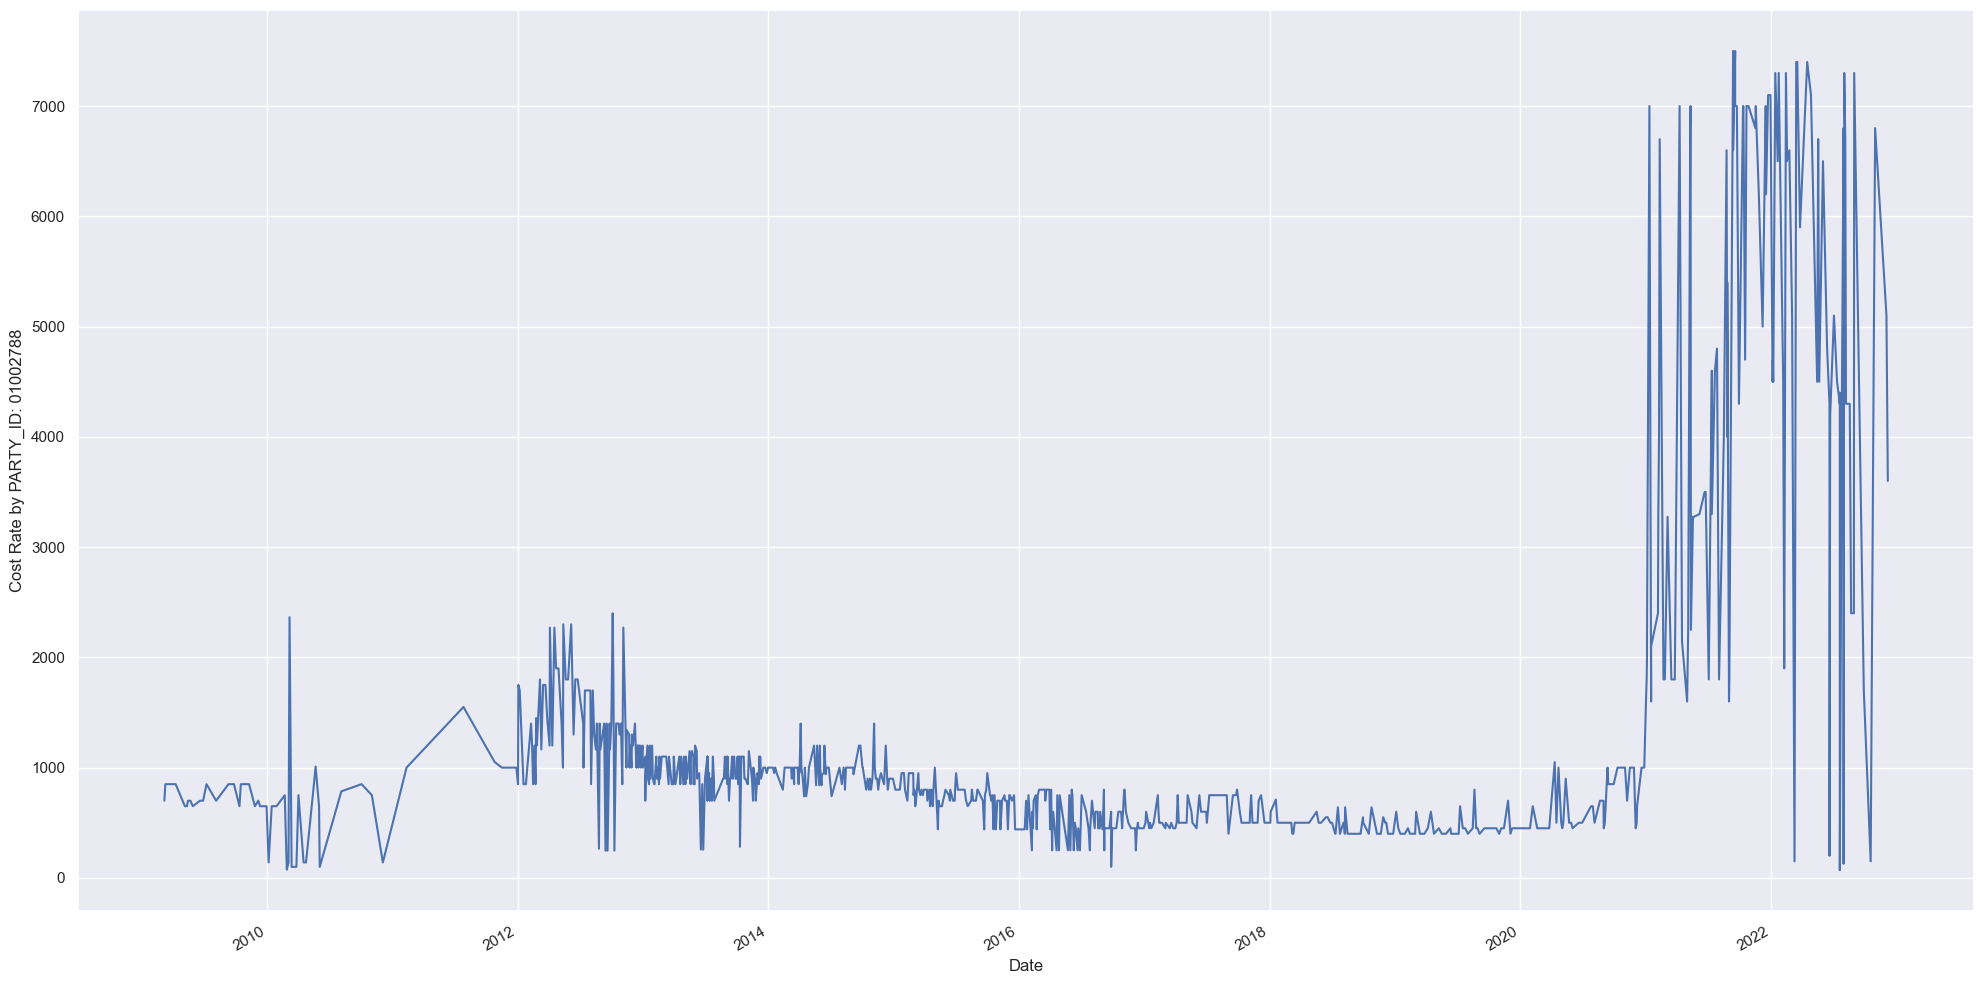

In [73]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(sel_cntr_df);
ax.set_xlabel('Date')
ax.set_ylabel('Cost Rate by PARTY_ID: ' + sel_party)

fig.autofmt_xdate()
plt.tight_layout();